In [1]:
from dotenv import load_dotenv

In [2]:
import os

In [3]:
load_dotenv()

True

In [4]:
API_KEY = os.getenv("API_KEY")
API_KEY_SECRET = os.getenv("API_KEY_SECRET")
ACCESS_TOKEN = os.getenv("ACCESS_TOKEN")
ACCESS_TOKEN_SECRET = os.getenv("ACCESS_TOKEN_SECRET")

In [5]:
import tweepy

auth = tweepy.OAuthHandler(API_KEY, 
                           API_KEY_SECRET)
auth.set_access_token(ACCESS_TOKEN, 
                      ACCESS_TOKEN_SECRET)

api = tweepy.API(auth)

In [6]:
public_tweets = api.home_timeline()
for tweet in public_tweets[:2]:
    print(tweet.text)

i moved to the US last November and started building the team with @abarrallen 

the first anniversary of our earli… https://t.co/YlvUxR0Cvw
In North Dakota, 1 in every 800 people is already dead of covid-19, and that number is going to get worse. https://t.co/rcD9Rp4mZa


In [7]:
query = 'AI ethics'

In [8]:
# Collect tweets
tweets = tweepy.Cursor(api.search,
                       q=query,
                       lang="en").items(15)

# Collect a list of tweets
tweets = [tweet.text for tweet in tweets]

In [9]:
from sentiment_model import SentimentModel

In [10]:
from tensorflow import keras

model_r = keras.models.load_model('sentiment_model_lstm_v1/')

In [11]:
sm = SentimentModel(model_r)

In [12]:
results = sm.predict_sentiments(tweets)

(array([12.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  1.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

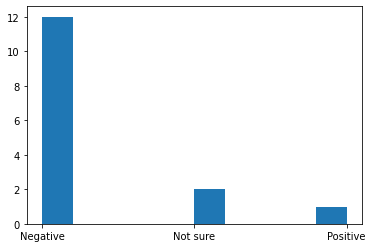

In [13]:
import matplotlib.pyplot as plt

plt.hist(results)